In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

## analyze only the users and not the admins

In [3]:
df = pd.io.sql.read_sql('''SELECT uid, timestamp 
                        FROM checker
                        WHERE uid LIKE "user_%"''', con, 
                        parse_dates=['timestamp'])

df.head()

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370


In [4]:
df['weekday'] = df.timestamp.dt.dayofweek
df['hour'] = df.timestamp.dt.hour
df['day'] = df.timestamp.dt.day
df['type'] = df.weekday.apply(lambda x: 'working_day' if x < 5 else 'weekend')

In [5]:
df.head()

,uid,timestamp,weekday,hour,day,type
0,user_4,2020-04-17 05:19:02.744528,4,5,17,working_day
1,user_4,2020-04-17 05:22:35.249331,4,5,17,working_day
2,user_4,2020-04-17 05:22:45.549397,4,5,17,working_day
3,user_4,2020-04-17 05:34:14.691200,4,5,17,working_day
4,user_4,2020-04-17 05:34:24.422370,4,5,17,working_day


## create two lists of values (for working days and for weekends) for the histogram input

In [6]:
working_day = df[df['type'] == 'working_day'][['hour']].reset_index(drop=True)

In [7]:
weekend = df[df['type'] == 'weekend'][['hour']].reset_index(drop=True)

## the figsize is still the same, the fontsize you can choose as well as the color palette
##  use the level of transparency of the histogram in front equal to 0.7

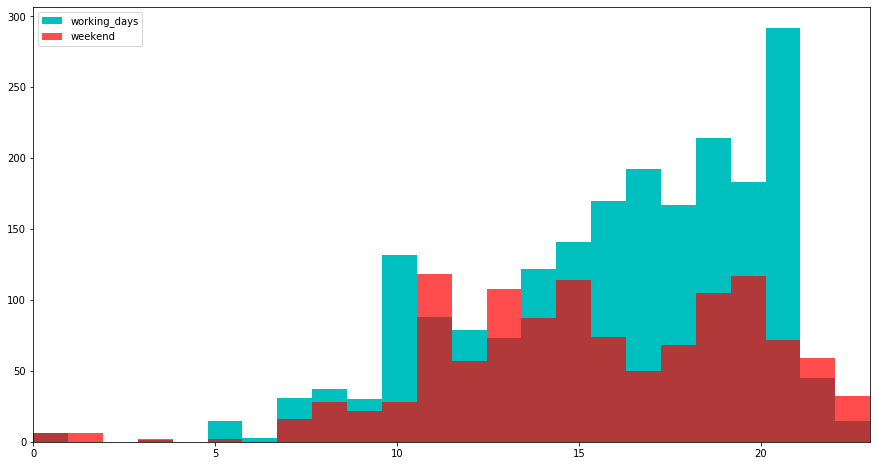

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(working_day['hour'], bins = 24, label='working_days', color='c')
ax.hist(weekend['hour'], bins = 24, label='weekend', color='r', alpha=0.7)
ax.set_xlim(0, 23)
ax.legend(loc='upper left', fontsize='10')
plt.show()

## Are there hours when the total number of commits was higher on weekend than on working days?

In [9]:
data = df.groupby(['type','hour'])['uid'].count().reset_index()
res = pd.pivot_table(data, values='uid', index='hour', columns='type')
res['diff'] = res['weekend'] - res['working_day']
result = list(res.sort_values('diff', ascending=False).head(4).index)
print(', '.join([str(i) for i in result]))

13, 11, 23, 22


In [10]:
con.close()